# Статистический анализ данных сервиса аренды самокатов GoFast

Для статистического анализа данных сервиса аренды самокатов GoFast переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки

абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.
В основных данных есть информация о пользователях, их поездках и подписках.

###### Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя

name — имя пользователя

age — возраст

city — город

subscription_type — тип подписки (free, ultra)

###### Поездки — rides_go.csv

user_id — уникальный идентификатор пользователя

distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date — дата совершения поездки

###### Подписки — subscriptions_go.csv

subscription_type — тип подписки

minute_price — стоимость одной минуты поездки по данной подписке

start_ride_price — стоимость начала поездки

subscription_fee — стоимость ежемесячного платежа


In [2]:
from scipy import stats as st
from math import factorial, sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###### Шаг 1. Загрузка данных

In [3]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


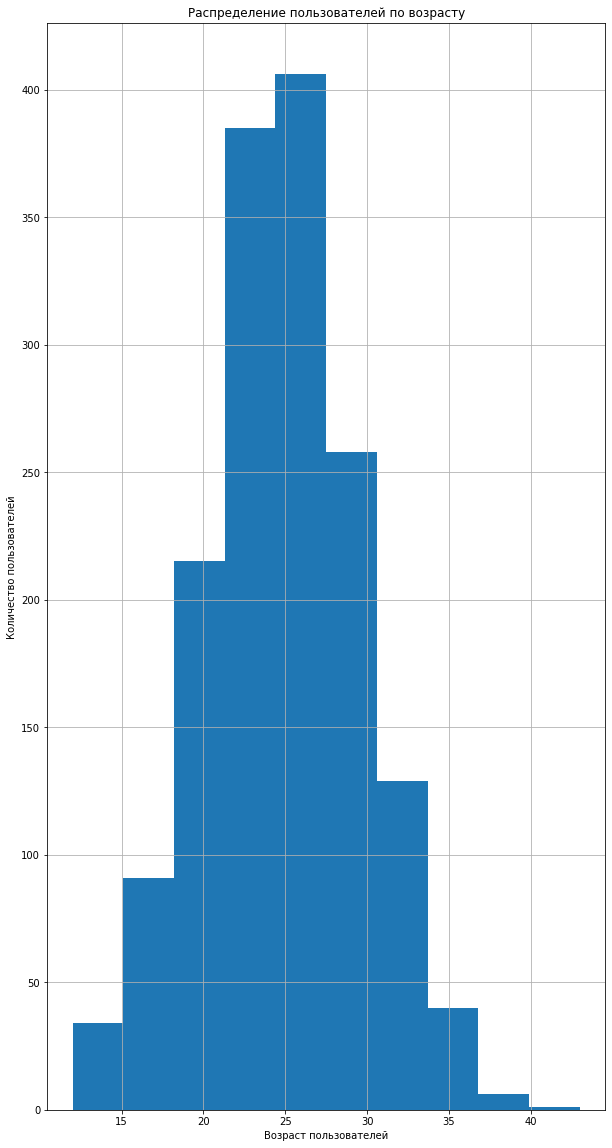

In [5]:
data_users['age'].hist(figsize = (10, 20))
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.show();

Максимальное количество пользователей пользуются приложением в возрасте от 24 до 28 лет, меньше всего - люди старше 40 лет.

In [6]:
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
data_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


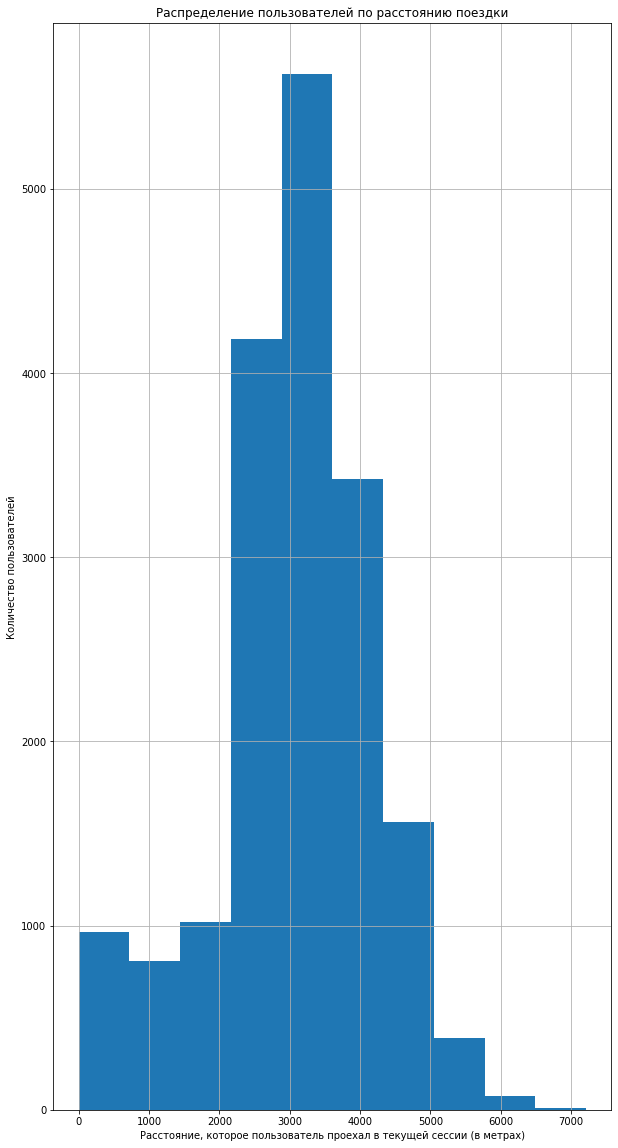

In [9]:
data_rides['distance'].hist(figsize = (10, 20))
plt.title('Распределение пользователей по расстоянию поездки')
plt.xlabel('Расстояние, которое пользователь проехал в текущей сессии (в метрах)')
plt.ylabel('Количество пользователей')
plt.show();

Самое популярное расстояние, которое пользователь проехал в текущей сессии - от 2900 до 3400 м, расстояние дальше 6500 м имеет наименьшую популярность среди пользователей.

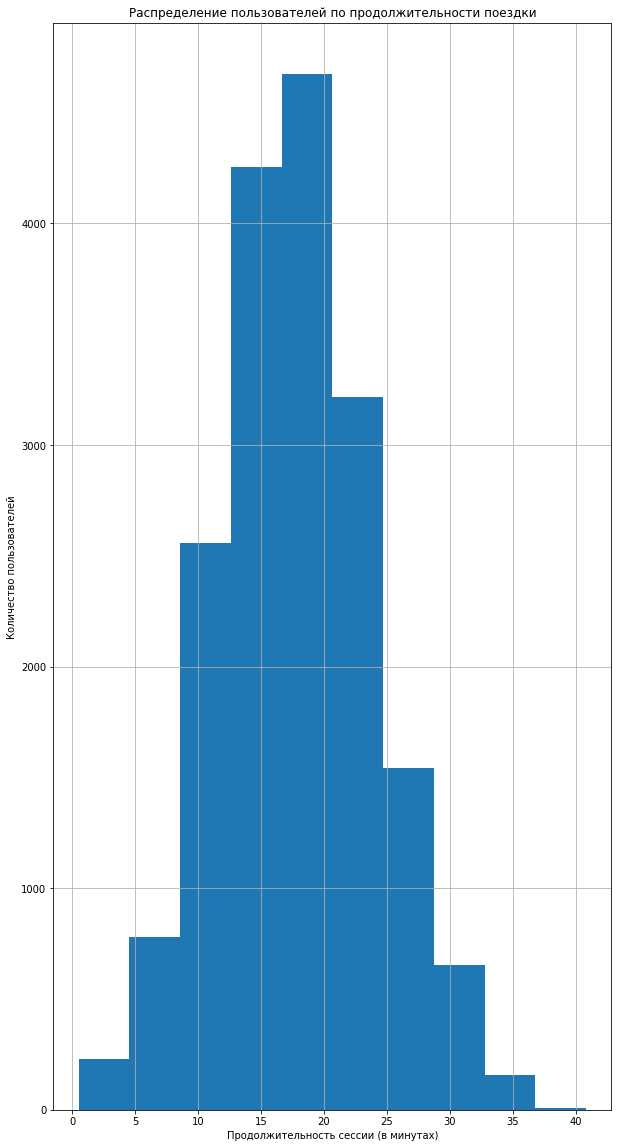

In [10]:
data_rides['duration'].hist(figsize = (10, 20))
plt.title('Распределение пользователей по продолжительности поездки')
plt.xlabel('Продолжительность сессии (в минутах)')
plt.ylabel('Количество пользователей')
plt.show();

Самое распространенное время поездки среди пользователей приложения от 17 до 20 минут,меньше всего поздок дольше 37 минут.

In [11]:
data_subscription = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscription.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
data_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Из полученных данных можно сделать вывод, что максимальное число пользователей приложения возрастом от 22 до 27 лет. В основном популярны поездки на 2100-4200 м. Максимальное количество поездок длились от 14 до 21 минуты.
Также обнаружено, что в датафрейме data_rides неверно указан тип date.

###### Шаг 2. Предобработка данных

###### Приведем столбец date к типу даты pandas

In [13]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
data_rides.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


###### Создадим новый столбец с номером месяца на основе столбца date

In [15]:
data_rides['month'] = data_rides['date'].dt.month 

In [16]:
data_rides.head() # проверяем

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


###### Проверим наличие пропущенных значений и дубликатов в датафреймах

In [17]:
data_users.duplicated().sum()

31

In [18]:
data_users['user_id'].duplicated().sum()

31

In [19]:
print(data_users['user_id'].value_counts())

209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64


In [20]:
data_users = data_users.drop_duplicates(subset=['user_id'], keep='first')

In [21]:
print(data_users['user_id'].value_counts())

1       1
1020    1
1029    1
1028    1
1027    1
       ..
510     1
509     1
508     1
507     1
1534    1
Name: user_id, Length: 1534, dtype: int64


In [22]:
data_users = data_users.reset_index(drop=True) # удаляем старые индексы и создаем новые

In [23]:
data_users['user_id'].duplicated().sum() # проверяем 

0

In [24]:
data_rides.duplicated().sum() 

0

In [25]:
data_subscription.duplicated().sum()  

0

Явные дубликаты обнаружились в data_users в столбце 'user_id', избавились от дубликатов без удаления строк и восстановили порядок индексов. 

Расмотрим количество пропусков в информации о пользователях

In [26]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Расмотрим количество пропусков в информации о поездках пользователей

In [27]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Расмотрим количество пропусков в информации о подписках пользователей

In [28]:
data_subscription.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет

Рассмотрим неявные дубликаты 

In [29]:
data_users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [30]:
data_users['name'] = data_users['name'].replace('Наташа','Наталья')

In [31]:
data_users['name'].sort_values().unique() # проверим

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [32]:
data_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

Неявные дубликаты Наташа и Наталья обнаружены в столбце 'name' датафрейма data_users, данный дубликат устранен.

###### Шаг 3. Исследовательский анализ данных

Опишишем и визуализируем общую информацию о пользователях и поездках

###### Частота встречаемости городов

In [33]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

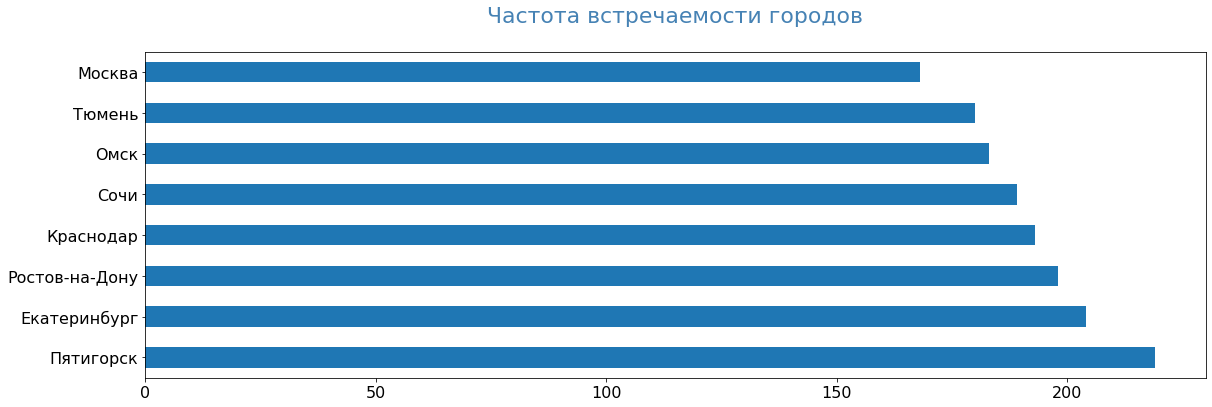

In [34]:
data_users['city'].value_counts().plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)\
                  .set_title('Частота встречаемости городов' + "\n", fontsize = 22, color = 'SteelBlue');

Чаще всего приложение используют жители Пятигорска.

###### Соотношение пользователей с подпиской и без подписки

In [35]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

In [36]:
data_users['subscription_type'].shape[0]

1534

In [37]:
count_with_subscription = data_users['subscription_type'].value_counts()['ultra']

In [38]:
count_without_subscription = data_users['subscription_type'].value_counts()['free']

In [39]:
ratio_with = round(count_with_subscription / data_users['subscription_type'].shape[0] * 100)

In [40]:
ratio_without = round(count_without_subscription / data_users['subscription_type'].shape[0] * 100)

In [41]:
print(ratio_with)

46


In [42]:
print(ratio_without)

54


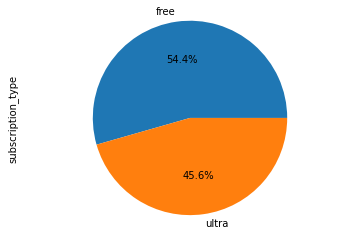

In [43]:
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()


Из графика видно, что количество пользователей без подписки больше на 8.8%

###### Возраст пользователей

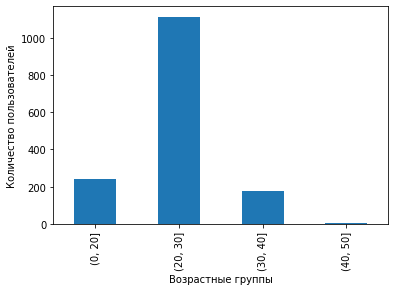

In [44]:
age_groups = data_users.groupby(pd.cut(data_users['age'], bins=[0, 20, 30, 40, 50]))
count_users = age_groups.size()
count_users.plot(kind='bar')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество пользователей')
plt.show()

Наибольшее количество пользователей находится в группе от 20 до 30 лет.

###### Расстояние, которое пользователь преодолел за одну поездку

In [45]:
data_rides['distance'].mean()

3070.6599756818814

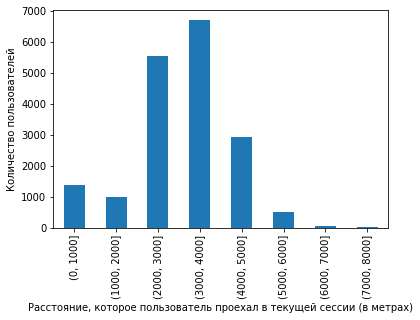

In [46]:
distance_groups = data_rides.groupby(pd.cut(data_rides['distance'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]))
count_distance = distance_groups.size()
count_distance.plot(kind='bar')
plt.xlabel('Расстояние, которое пользователь проехал в текущей сессии (в метрах)')
plt.ylabel('Количество пользователей')
plt.show()

Среднее значение 3070 м., чаще всего за одну поездку пользователи проезжали от 3000 м до 4000, меньше на расстояния более 6000. Скорее всего, на большие расстояния пользователям не выгодно ездить, так как больше половины пользователей не пользуется подпиской.

###### Продолжительность поездок

In [47]:
data_rides['duration'].mean()

17.80501119798444

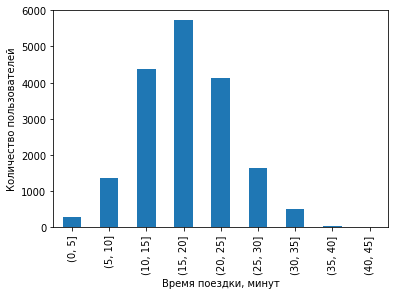

In [48]:
duration_groups = data_rides.groupby(pd.cut(data_rides['duration'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]))
count_duration = duration_groups.size()
count_duration.plot(kind='bar')
plt.xlabel('Время поездки, минут')
plt.ylabel('Количество пользователей')
plt.show()

Среднее время поездки составило 18 минут, максимальное количество поездок длилось от 15 до 20 минут, наименьшее больше 35 минут.

###### Шаг 4. Объединение данных

###### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [49]:
first_merged_data = pd.merge(data_users, data_rides, on='user_id')
merged_data = pd.merge(first_merged_data, data_subscription, on='subscription_type')
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [50]:
data_users.shape[0]

1534

In [51]:
data_rides.shape[0]

18068

In [52]:
data_subscription.shape[0]

2

In [53]:
merged_data.shape[0]

18068

###### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1

C данными о пользователях без подписки

In [54]:
no_sub_users = merged_data[merged_data['subscription_type'] == 'free']

In [55]:
no_sub_users.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


C данными о пользователях с подпиской

In [56]:
sub_users = merged_data[merged_data['subscription_type'] != 'Ultra']

In [57]:
sub_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


###### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

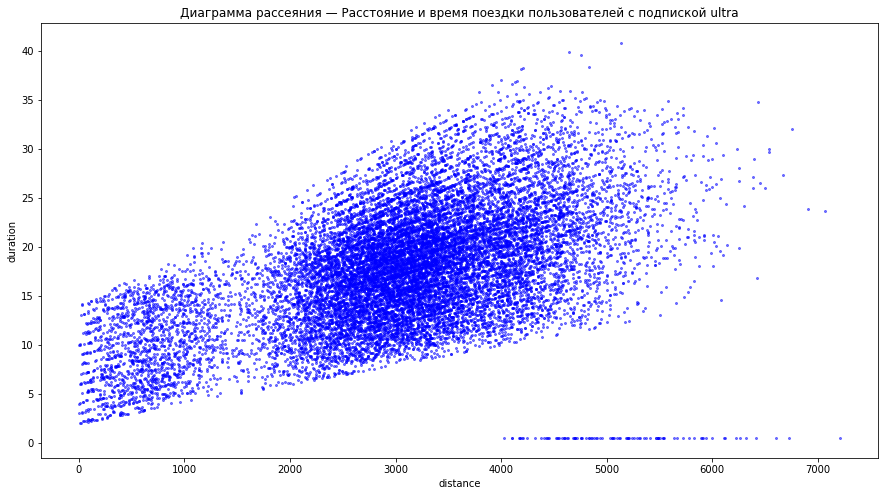

In [58]:
sub_users.plot(kind='scatter',
        y='duration' , x='distance', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Расстояние и время поездки пользователей с подпиской ultra');


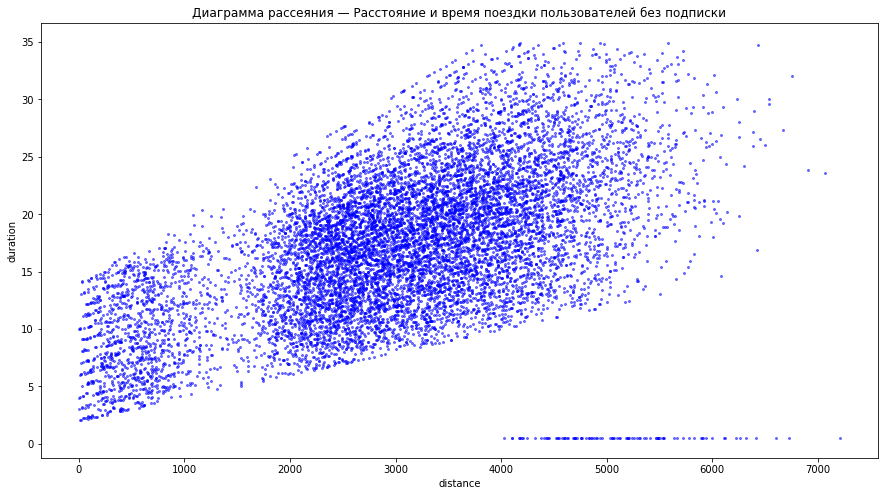

In [59]:
no_sub_users.plot(kind='scatter',
        y='duration' , x='distance', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Расстояние и время поездки пользователей без подписки');

На обеих диаграммах есть выбросы, где время поездки около двух минут, при этом растояние поездки больше 40000. Так же на дмаграмме с подпиской большую плотность имеют поездки от 10 до 20 минут на расстояние 3000 м.

###### Шаг 5. Подсчёт выручки

###### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [60]:
table = merged_data.groupby(['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', \
                             'subscription_fee']).agg({'distance':sum, 'duration':sum, 'date':'count'}).reset_index()
table.rename(columns={'date':'trips_count'}, inplace=True)

In [61]:
table.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,trips_count
0,1,1,ultra,6,0,199,7027.511294,41.416640,2
1,1,4,ultra,6,0,199,754.159807,6.232113,1
2,1,8,ultra,6,0,199,6723.470560,44.776802,2
3,1,10,ultra,6,0,199,5809.911100,31.578017,2
4,1,11,ultra,6,0,199,7003.499363,53.397424,3


###### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

Для начала округлим продолжительность каждой поездки

In [62]:
table['duration'] = np.ceil(table['duration']).astype(int)

In [63]:
table.head() # проверяем

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,trips_count
0,1,1,ultra,6,0,199,7027.511294,42,2
1,1,4,ultra,6,0,199,754.159807,7,1
2,1,8,ultra,6,0,199,6723.470560,45,2
3,1,10,ultra,6,0,199,5809.911100,32,2
4,1,11,ultra,6,0,199,7003.499363,54,3


In [64]:

# Стоимость поездки без подписки
table['price_without_subscription'] = table['start_ride_price'] * table['trips_count'] + table['minute_price'] * table['duration']

# Стоимость поездки с подпиской Ultra
table['price_with_ultra_subscription'] =  table['minute_price'] *  table['duration'] +  table['subscription_fee']

# Функция для расчета помесячной выручки
def calculate_monthly_revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['price_with_ultra_subscription']
    if row['subscription_type'] == 'free':
        return row['price_without_subscription']
    
# Добавление столбца с помесячной выручкой
table['monthly_revenue'] = table.apply(calculate_monthly_revenue, axis=1)

In [65]:
table.query('subscription_type == "free"')

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,trips_count,price_without_subscription,price_with_ultra_subscription,monthly_revenue
4533,700,1,free,8,50,0,2515.690719,15,1,170,120,170
4534,700,2,free,8,50,0,13446.659764,86,5,938,688,938
4535,700,3,free,8,50,0,3798.334905,19,1,202,152,202
4536,700,4,free,8,50,0,2984.551206,16,1,178,128,178
4537,700,6,free,8,50,0,5927.650988,29,2,332,232,332
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,25,2,300,200,300
11327,1534,8,free,8,50,0,7622.453034,48,2,484,384,484
11328,1534,9,free,8,50,0,4928.173852,23,1,234,184,234
11329,1534,11,free,8,50,0,13350.015305,77,4,816,616,816


###### Шаг 6. Проверка гипотез

###### Проверим гипотезу: тратят ли пользователи с подпиской больше времени на поездки

Нулевая гипотеза (Н0): среднее время поездки  пользователей с подпиской и без подписки равны.

Альтернативная гипотеза (Н1): среднее значение времени поездки пользователей с подпиской больше, чем среднее значение времени поездки пользователей без подписки.

In [66]:
alpha = 0.05 

results = st.ttest_ind(sub_users['duration'], no_sub_users['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 9.443705647077102e-09
Отвергаем нулевую гипотезу


Полученное значение p-value (~9.4437056) больше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

###### Проверим гипотезу: можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Нулевая гипотеза (Н0): среднее расстояние, которое пользователь проехал в текущей сессии = 3130.

Альтернативная гипотеза (Н1): среднее расстояние, которое пользователь проехал в текущей сессии > 3130.

In [68]:
distance_with_subs = 3130 

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    sub_users['distance'], 
    distance_with_subs, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9999999999995223
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value (~0.9999999), не получилось отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской ездят чаще всего на расстояние равное 3130 м.

###### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая гипотеза (Н0): помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки.

Альтернативная гипотеза (Н1): помесячная выручка от пользователей с подпиской по месяцам больше помесячной выручки от пользователей без подписки.

In [67]:
sub = table.loc[table['subscription_type'] == 'ultra']['monthly_revenue']
not_sub = table.loc[table['subscription_type'] == 'free']['monthly_revenue']

alpha = 0.05 
results = st.ttest_ind(sub, not_sub, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


Полученное значение p-value (~ 2.81309) больше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что выручка пользователей с подпиской выше, чем выручка от пользователей без подписки.

###### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае, мы будем анализировать одну генеральную совокупность, с которой произошли некоторые изменения. В этом случае будем проверять, равны ли средние совокупности до и после этого изменения. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

###### Шаг 7. Распределения

###### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [69]:
n = 1000000  # количество уведомлений
p = 0.4  # вероятность открытия одного уведомления
mu = n * p  # математическое ожидание (среднее значение)
sigma = sqrt(n * p * (1 - p))  # стандартное отклонение
threshold = 399500  # пороговое значение

# вычисляем значение z-оценки
z_score = (threshold - mu) / sigma

# считаем вероятность для значений меньше порогового значения
prob = st.norm.cdf(z_score)

print(f"Вероятность открытия уведомления не более {threshold} пользователей: {prob:.2%}")

Вероятность открытия уведомления не более 399500 пользователей: 15.37%


Итак, проведен статистический анализ данных сервиса аренды самокатов GoFast по данным о некоторых пользователях из нескольких городов и их поездках.
Изучена информация в трех датафреймах: /datasets/users_go.csv
                                       /datasets/rides_go.csv
                                       /datasets/subscriptions_go.csv.
Из полученных данных можно сделать вывод, что максимальное число пользователей приложения возрастом от 22 до 27 лет. В основном популярны поездки на расстояния от 2100-4200 м. Максимальное количество поездок длились от 14 до 21 минуты. Также обнаружено, что в датафрейме data_rides неверно указан тип date.

В ходе предобработки данных: столбец date прриведен к типу даты pandas, создан новый столбец с номером месяца на основе столбца date, найдены и обработаны дубликаты в столбце user_id датафрейма data_users.

В ходе исследовательского анализа данных выявлено, что чаще всего приложение используют жители Пятигорска, а реже жители Москвы.
По соотношению пользователей с подпиской и без подписки можно наблюдать, что что количество пользователей без подписки (54.4 %) больше на 8.8%. Наибольшее количество пользователей находится в группе от 20 до 30 лет. Среднее значение расстояния, которое пользователь преодолел за одну поездку равно 3070 м., чаще всего за одну поездку пользователи проезжали от 3000 м до 4000, меньше на расстояния более 6000. Скорее всего, на большие расстояния пользователям не выгодно ездить, так как больше половины пользователей не пользуется подпиской. Среднее время поездки составило 18 минут, максимальное количество поездок длилось от 15 до 20 минут, поездок больше 35 минут наименьшее количество. 

В ходе анализа построены диаграммы рассеяния — Расстояние и время поездки для пользователей без подписки и с подпиской.На обеих диаграммах есть выбросы, где время поездки около двух минут, при этом растояние поездки больше 40000. Так же на дмаграмме с подпиской большую плотность имеют поездки от 10 до 20 минут на расстоянии 3000 м.

Для расчета выручки создан датафрейм table с агрегированными данными о поездках с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.

Следущим этапом статистического анализа является проверка гипотез. При проверке гипотезы: тратят ли пользователи с подпиской больше времени на поездки, где нулевая гипотеза (Н0): среднее время поездки пользователей с подпиской и без подписки равны,
альтернативная гипотеза (Н1): среднее значение времени поездки пользователей с подпиской больше, чем среднее значение времени поездки пользователей без подписки, полученное значение p-value (~ 0.0011072) получилось меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.
В следующей гипотезе: можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, где нулевая гипотеза (Н0): среднее расстояние, которое пользователь проехал в текущей сессии = 3130,
альтернативная гипотеза (Н1): среднее расстояние, которое пользователь проехал в текущей сессии > 3130, полученное значение p-value (~0.9999999), не получилось отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской ездят чаще всего на расстояние равное 3130 м.